This script is only for demo. You can modify the visualizing function to fit your own use.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
train = pd.read_csv('ais_train.csv', sep='|')
train['time'] = pd.to_datetime(train['time'])
train.tail()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b
1522064,2024-05-07 23:59:08,336.0,14.3,5,337,0,05-07 23:00,38.98635,-75.13275,62080cff66fc0a8e43c6123a,61d38528b7b7526e1adf3e6f


In [2]:


def visualize_vessel_movements(df):
    """
    Visualize vessel movements on a map with lines and markers for each data point.

    Parameters:
    - df (pandas.DataFrame): A DataFrame with columns ['time', 'latitude', 'longitude', 'vesselId'].

    Returns:
    - A Plotly interactive figure.
    """
    # Ensure 'time' is in datetime format for better tooltip handling
    df['time'] = pd.to_datetime(df['time'])
    
    # Sorting the DataFrame by time to ensure lines are drawn correctly
    df = df.sort_values(by=['vesselId', 'time'])

    # Define a color palette
    color_map = px.colors.qualitative.Plotly

    # Mapping each vessel ID to a color
    unique_vessels = df['vesselId'].unique()
    colors = {vessel_id: color_map[i % len(color_map)] for i, vessel_id in enumerate(unique_vessels)}

    # Create the base map with lines
    fig = px.line_geo(df,
                      lat='latitude',
                      lon='longitude',
                      color='vesselId',
                      color_discrete_map=colors,
                      hover_name='vesselId',
                      hover_data={'time': True, 'latitude': ':.3f', 'longitude': ':.3f'},
                      projection='natural earth',
                      title='Vessel Movements Over Time')

    # Add markers for each data point
    for vessel_id in unique_vessels:
        vessel_data = df[df['vesselId'] == vessel_id]
        fig.add_trace(go.Scattergeo(
            lon=vessel_data['longitude'],
            lat=vessel_data['latitude'],
            mode='markers',
            marker=dict(
                size=8,
                color=colors[vessel_id],
                opacity=0.8,
                line=dict(width=1, color='DarkSlateGrey')
            ),
            name=f'Markers for {vessel_id}',
            hoverinfo='text',
            text=vessel_data.apply(lambda row: f'ID: {vessel_id}<br>Time: {row["time"]}<br>Lat: {row["latitude"]:.3f}<br>Lon: {row["longitude"]:.3f}', axis=1)
        ))

    # Enhancing map and layout details
    fig.update_geos(fitbounds="locations", showcountries=True, countrycolor="RebeccaPurple")
    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},
                      coloraxis_colorbar=dict(title="Vessel ID"),
                      title_font_size=20)
    
    return fig

In [4]:
fig = visualize_vessel_movements(
    train[train['vesselId'] == '61e9f3a8b937134a3c4bfdf7']
)
fig.show()  

C:\Users\Simen\AppData\Local\Temp\ipykernel_32876\251048224.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


In [5]:
fig = visualize_vessel_movements(
    train[train['vesselId'] == '61e9f3b4b937134a3c4bfe77']
)
fig.show()  

C:\Users\Simen\AppData\Local\Temp\ipykernel_32876\251048224.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_10522/251048224.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



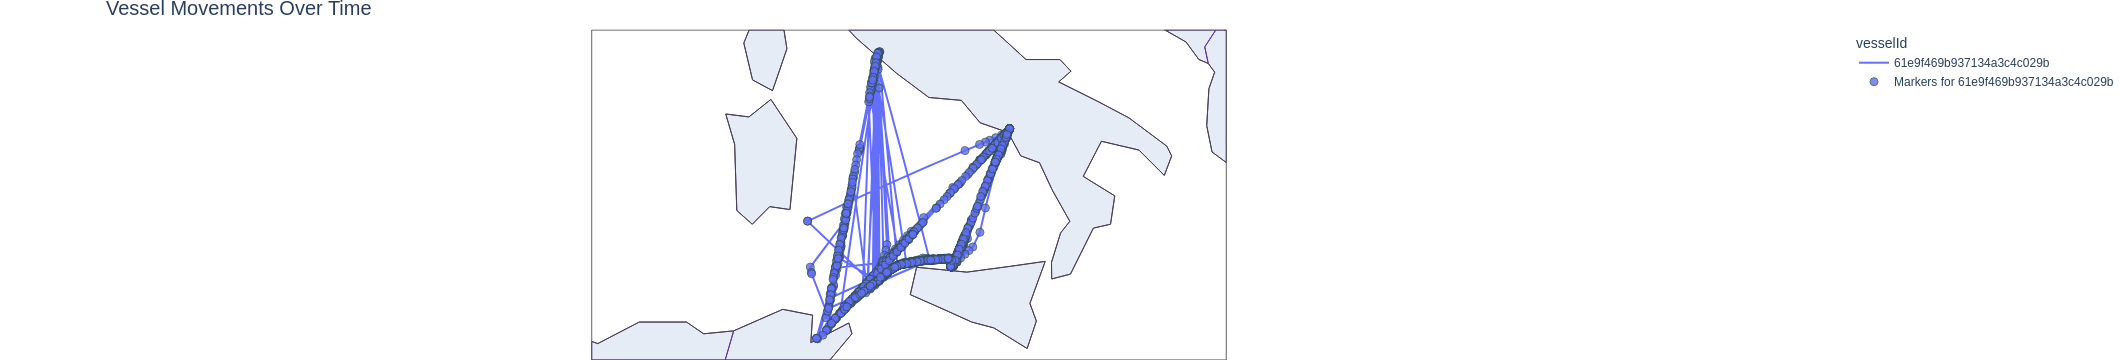

In [6]:
fig = visualize_vessel_movements(
    train[train['vesselId'] == '61e9f469b937134a3c4c029b']
)
fig.show()  

In [9]:
data = pd.read_csv('../data/visualizer_full.csv')
fig = visualize_vessel_movements(data)
fig.show()